In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
import numpy as np
from math import pi, sqrt
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\Quantomatic.jar'
zx.tikz.tikzit_location = r'C:\Users\John\Documents\tikzit\tikzit.exe'

[[1.41421356+0.j 0.        +0.j]
 [1.41421356+0.j 0.        +0.j]]


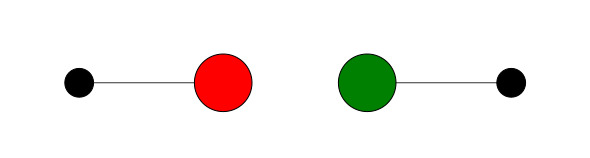

In [3]:
g = zx.Graph()
v = g.add_vertex(2,0,1)
w = g.add_vertex(1,0,2)
o1 = g.add_vertex(0,0, 3)
i1 = g.add_vertex(0,0, 0)
#g.add_edge((v,w))
g.add_edges([(i1,v),(w,o1)])
g.outputs = [o1]
g.inputs = [i1]

#z = g.add_vertex(1,1,1.5)
#g.add_edges([(v,z),(w,z),(v,w)])

t = g.to_tensor()
print(t)
zx.draw(g)

In [4]:
print(g.to_matrix())

[[1.41421356+0.j 0.        +0.j]
 [1.41421356+0.j 0.        +0.j]]


In [152]:
t = np.array(1)
tensor = np.tensordot(t,id2,axes=0)
tensor.shape
#t.squeeze()

(2, 2)

In [37]:
t.shape

(1, 2, 1, 2)

[[0.35355339+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]
 [0.        +0.j 0.35355339+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.35355339+0.j]]


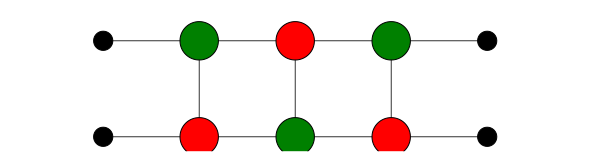

In [5]:
c = zx.Circuit(2)
c.add_gate("CNOT",0,1)
c.add_gate("CNOT",1,0)
c.add_gate("CNOT",0,1)
#c.add_gate("S",0)
#c.add_gate("XPhase",0,phase=Fraction(1,2))
#c.add_gate("S",0)
#c.add_circuit(c)
#g = c.to_graph()
#b = g.outputs.pop()
#g.remove_vertex(b)
t = c.to_matrix()
print(t)
zx.draw(c)

In [24]:
t[(0,0,0,0)]

(0.7071067811865477+0j)

In [7]:
def tensor_to_matrix(t, inputs, outputs):
    rows = []
    for r in range(2**outputs):
        o = [int(i) for i in bin(r)[2:].zfill(outputs)]
        row = []
        for c in range(2**inputs):
            a = o.copy()
            a.extend([int(i) for i in bin(c)[2:].zfill(inputs)])
            #print(a)
            #print(t[tuple(a)])
            row.append(t[tuple(a)])
        rows.append(row)
    return np.matrix(rows)

In [12]:
zx.tensor.tensor_to_matrix(t,2,2)
#tensor_to_matrix(t,2,2)

matrix([[0.35355339+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
        [0.        +0.j, 0.        +0.j, 0.35355339+0.j, 0.        +0.j],
        [0.        +0.j, 0.35355339+0.j, 0.        +0.j, 0.        +0.j],
        [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.35355339+0.j]])

In [10]:
np.set_printoptions(suppress=True)
tensor_to_matrix(t,1)

matrix([[ 0.+1.j, -0.+0.j],
        [ 0.-0.j,  0.+1.j]])

In [90]:
a = 3
t[tuple(int(i) for i in '{0:04b}'.format(a))]

(0.7071067811865477+0j)

In [93]:
bin(5)[2:].zfill(6)

'000101'

In [99]:
tuple(zip([1,2,3],[4,5,6]))

((1, 4), (2, 5), (3, 6))

In [17]:
z = 1 + math.cos(math.pi/4) + 1j*math.sin(math.pi/4)
abs(z)

1.8477590650225735

In [18]:
z2 = 1 - math.cos(math.pi/4) - 1j*math.sin(math.pi/4)
abs(z2)

0.7653668647301796